## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import learning_curve, train_test_split

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm import tqdm

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
df = pd.read_csv('/Users/trannguyenmyanh/Documents/VietFinanceLab-Analyzing-Market-Trends-and-Forecasting-Future-Price/Dataset/construction/PTC.csv', sep='\t', index_col=0)

In [3]:
df.head()

,Open,High,Low,Close,Volume,TradingDate,Code
0,15430.0,15430.0,13890.0,13890.0,5100,2006-12-25,PTC
1,13890.0,14440.0,13890.0,14440.0,7200,2006-12-26,PTC
2,15560.0,15560.0,14200.0,14200.0,5000,2006-12-27,PTC
3,14810.0,15590.0,14810.0,14200.0,9700,2006-12-28,PTC
4,15430.0,15430.0,14200.0,15120.0,11500,2006-12-29,PTC


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4506 entries, 0 to 4505
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         4506 non-null   float64
 1   High         4506 non-null   float64
 2   Low          4506 non-null   float64
 3   Close        4506 non-null   float64
 4   Volume       4506 non-null   int64  
 5   TradingDate  4506 non-null   object 
 6   Code         4506 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 281.6+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,4506.000000,4506.000000,4506.000000,4506.000000,4.506000e+03
mean,5545.521527,5660.798935,5414.884598,5539.494008,7.201237e+04
std,5427.424557,5589.247115,5220.219287,5409.454728,1.624761e+05
min,1140.000000,1170.000000,1140.000000,1140.000000,0.000000e+00
25%,3142.500000,3210.000000,3090.000000,3152.500000,1.552500e+03
50%,3980.000000,4070.000000,3920.000000,4000.000000,1.380500e+04
75%,5440.000000,5560.000000,5350.000000,5447.500000,6.125250e+04
max,46560.000000,48340.000000,45000.000000,46110.000000,2.065000e+06


## Data Cleaning

In [6]:
df['TradingDate'] = pd.to_datetime(df['TradingDate'], format='%Y-%m-%d')

In [7]:
df = df.dropna()

## Data Visualization

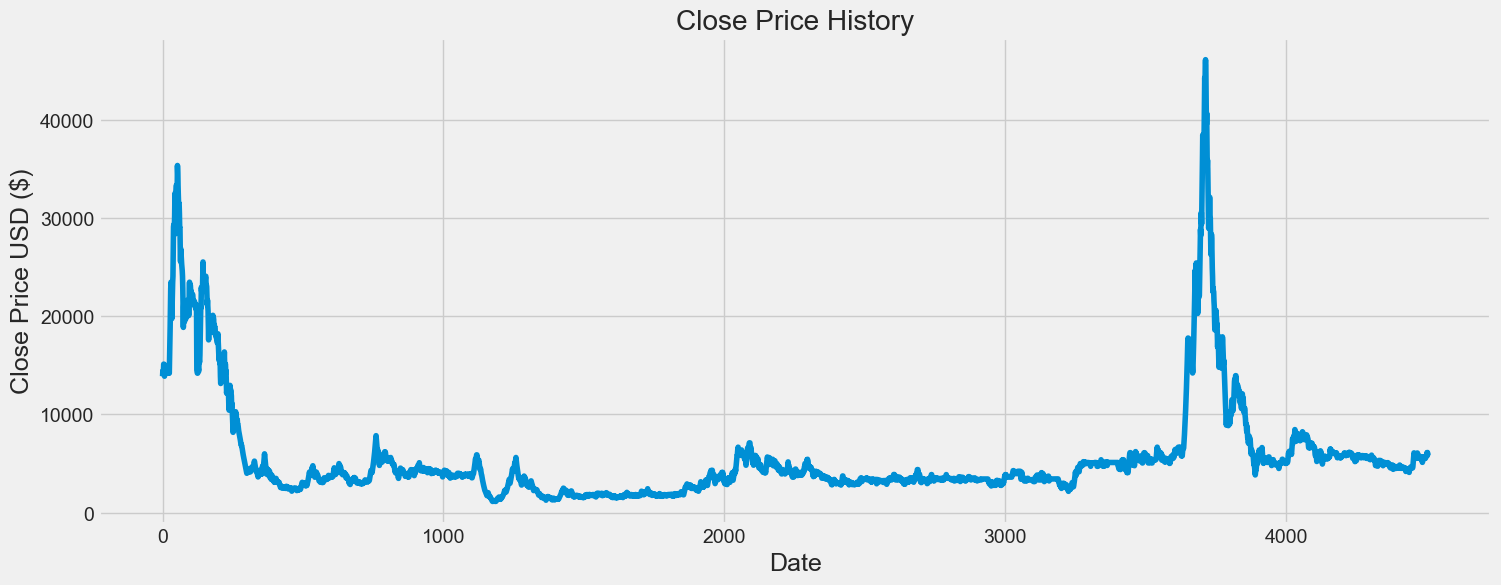

In [8]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Manipulate data

In [9]:
# Create a new dataframe
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [10]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.54385852],
       [1.64554363],
       [1.60117195],
       ...,
       [0.10917395],
       [0.07959282],
       [0.04816288]])